In [5]:
import hvplot.pandas
import pandas as pd
import json
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
# url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
# limit = "&$limit=1000000"
# token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
# response = requests.get(url,limit).json()

In [7]:
# To check total rows
len(response)

932140

In [8]:
# response

In [9]:
# Create a dataframe
response_df = pd.DataFrame(response)

In [10]:
#Display the new dataframe
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [11]:
#Total rows in new dataframe: 925,720
response_df["dr_no"].count()

932140

In [12]:
#Check the name of the columns
response_df.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4'],
      dtype='object')

In [13]:
# Change latitude and longitute from object to float
response_df["lon"] = response_df["lon"].astype(float)
response_df["lat"] = response_df["lat"].astype(float)

In [14]:
#Confirm lon, lat as float
response_df.dtypes

dr_no              object
date_rptd          object
date_occ           object
time_occ           object
area               object
area_name          object
rpt_dist_no        object
part_1_2           object
crm_cd             object
crm_cd_desc        object
vict_age           object
vict_sex           object
vict_descent       object
premis_cd          object
premis_desc        object
status             object
status_desc        object
crm_cd_1           object
crm_cd_2           object
location           object
lat               float64
lon               float64
mocodes            object
weapon_used_cd     object
weapon_desc        object
cross_street       object
crm_cd_3           object
crm_cd_4           object
dtype: object

In [15]:
#Create a copy of the dataframe to preserve the original
response_df_formatted = response_df.copy()

In [16]:
#Create a clean Dataframe by drop latitud and longitute = 0
response_df_formatted=response_df_formatted.loc[response_df_formatted["lon"] != 0]

In [17]:
# Confirm dataframe as been cleaned
response_df_formatted.loc[response_df_formatted["lat"] == 0]

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4


In [18]:
# To convert date occurence format, from object to date
# source: https://stackoverflow.com/questions/68296206/pandas-period-to-to-timestamp-giving-me-typeerror
response_df_formatted["date_occ"] =pd.to_datetime(response_df_formatted["date_occ"])
response_df_formatted


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932135,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
932136,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
932137,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
932138,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [19]:
# To confirm that date occurence format change successfully
response_df_formatted.dtypes

dr_no                     object
date_rptd                 object
date_occ          datetime64[ns]
time_occ                  object
area                      object
area_name                 object
rpt_dist_no               object
part_1_2                  object
crm_cd                    object
crm_cd_desc               object
vict_age                  object
vict_sex                  object
vict_descent              object
premis_cd                 object
premis_desc               object
status                    object
status_desc               object
crm_cd_1                  object
crm_cd_2                  object
location                  object
lat                      float64
lon                      float64
mocodes                   object
weapon_used_cd            object
weapon_desc               object
cross_street              object
crm_cd_3                  object
crm_cd_4                  object
dtype: object

In [20]:
#Drop crimes occured past before past Mar31/2024 (Team agreed on excluding Apr/2024 data, as it will gather partial data)
#source = https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/
response_df_formatted = response_df_formatted.loc[(response_df_formatted["date_occ"] >= "2020-03-01") & (response_df_formatted["date_occ"] <="2024-03-31")]
response_df_formatted

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,NaN,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932135,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,NaN,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN
932136,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,NaN,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN
932137,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,NaN,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN
932138,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,NaN,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN


In [21]:
#Extract year and month from date and put it in a new column
# Source:  https://stackoverflow.com/questions/37632766/python-pandas-get-fiscal-quarter-from-fiscal-year-and-month-for-uk
response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter
response_df_formatted

/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_95383/876511147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted["quarter"] = response_df_formatted["date_occ"].dt.quarter


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,9900 COMPTON AV,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932135,241605270,2024-02-11T00:00:00.000,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,8700 SHARP AV,34.2278,-118.4051,0913 1202 1501,NaN,NaN,NaN,NaN,NaN,1
932136,241604405,2024-01-14T00:00:00.000,2024-01-13,0720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,8700 LANKERSHIM BL,34.2271,-118.3878,0400 1822 1310 0416,207,OTHER KNIFE,NaN,NaN,NaN,1
932137,242106032,2024-02-20T00:00:00.000,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,22700 NAPA ST,34.2260,-118.6214,0385,NaN,NaN,NaN,NaN,NaN,1
932138,242004546,2024-01-16T00:00:00.000,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,HOBART BL,34.0690,-118.3054,2047 0400 0429 0444 1202 1822,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3RD ST,NaN,NaN,1


In [22]:
#Extract year from date and put it in a new column
#year = year of occurrence
response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')
# response_df_formatted = response_df_formatted.drop(['date_occ'], axis=1)
response_df_formatted.head()


/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_95383/2745890790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_df_formatted['Year'] = pd.to_datetime(response_df_formatted['date_occ']).dt.strftime('%Y')


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020


In [23]:
# To confirm year column is store successfully for the entire data
response_df_formatted.count()

dr_no             888978
date_rptd         888978
date_occ          888978
time_occ          888978
area              888978
area_name         888978
rpt_dist_no       888978
part_1_2          888978
crm_cd            888978
crm_cd_desc       888978
vict_age          888978
vict_sex          769434
vict_descent      769425
premis_cd         888968
premis_desc       888437
status            888978
status_desc       888978
crm_cd_1          888967
crm_cd_2           64364
location          888978
lat               888978
lon               888978
mocodes           763267
weapon_used_cd    306313
weapon_desc       306313
cross_street      138695
crm_cd_3            2164
crm_cd_4              61
quarter           888978
Year              888978
dtype: int64

In [24]:
#group by total crimes / Q1
response_df_q1 = response_df_formatted.loc[response_df_formatted["quarter"] == 1]
response_df_q1.groupby(["Year"])["dr_no"].count()


Year
2020    16152
2021    48004
2022    55955
2023    57501
2024    51432
Name: dr_no, dtype: int64

In [25]:
#group by total crimes / Q2
response_df_q2 = response_df_formatted.loc[response_df_formatted["quarter"] == 2]
response_df_q2.groupby(["Year"])["dr_no"].count()

Year
2020    49667
2021    49838
2022    60504
2023    56406
Name: dr_no, dtype: int64

In [26]:
#group by total crimes / Q3
response_df_q3 = response_df_formatted.loc[response_df_formatted["quarter"] == 3]
response_df_q3.groupby(["Year"])["dr_no"].count()

Year
2020    49438
2021    54938
2022    59411
2023    59118
Name: dr_no, dtype: int64

In [27]:
#group by total crimes / Q4
response_df_q4 = response_df_formatted.loc[response_df_formatted["quarter"] == 4]
response_df_q4.groupby(["Year"])["dr_no"].count()

Year
2020    47816
2021    55428
2022    59040
2023    58330
Name: dr_no, dtype: int64

In [28]:
# Configure the map plot, adding the year of the crime by location
map_plot_0 = response_df_formatted.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    color="Year",
    title = "Crime by Coordinates",
    alpha = 0.5
)

In [29]:
# map_plot_0

In [30]:

y_value = response_df_formatted.groupby(["Year"]).count()



In [31]:
# map_plot_0

<Axes: xlabel='Year'>

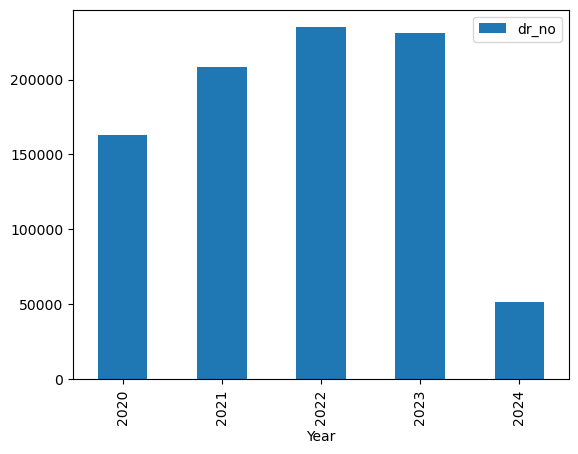

In [32]:
# y_value = response_df_formatted.groupby(["Year"]).count()


In [33]:
# y_value.reset_index(inplace=True)

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'vict_age',
       'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc', 'status',
       'status_desc', 'crm_cd_1', 'crm_cd_2', 'location', 'lat', 'lon',
       'mocodes', 'weapon_used_cd', 'weapon_desc', 'cross_street', 'crm_cd_3',
       'crm_cd_4', 'quarter', 'Year'],
      dtype='object')

In [25]:
# y_value.plot(kind="bar",x="Year",y="dr_no")

In [26]:
# response_df_formatted.columns

In [34]:
clean = response_df_formatted.dropna(subset=["date_occ", "area_name", "lat", "lon"])
clean.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4,quarter,Year
0,190326475,2020-03-01T00:00:00.000,2020-03-01,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,200320258,2020-11-11T00:00:00.000,2020-11-04,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN,4,2020
3,200907217,2023-05-10T00:00:00.000,2020-03-10,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN,1,2020
4,220614831,2022-08-18T00:00:00.000,2020-08-17,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN,3,2020
5,231808869,2023-04-04T00:00:00.000,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,...,33.9467,-118.2463,1822 0100 0930 0929,NaN,NaN,NaN,NaN,NaN,4,2020


In [35]:
clean_2021 = clean.loc[(clean["date_occ"] >= "2020-03-01") & (clean["date_occ"] < "2021-03-01")]
clean_2122 = clean.loc[(clean["date_occ"] >= "2021-03-01") & (clean["date_occ"] < "2022-03-01")]
clean_2223 = clean.loc[(clean["date_occ"] >= "2022-03-01") & (clean["date_occ"] < "2023-03-01")]
clean_2324 = clean.loc[(clean["date_occ"] >= "2023-03-01") & (clean["date_occ"] < "2024-03-01")]
clean_2021["Year"] = "2020"
clean_2122["Year"] = "2021"
clean_2223["Year"] = "2022"
clean_2324["Year"] = "2023"

/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_95383/4140397869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021["Year"] = "2020"
/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_95383/4140397869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122["Year"] = "2021"
/var/folders/c9/whb3jh8n0sz1zw9tjll5y44r0000gn/T/ipykernel_95383/4140397869.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [36]:
combodata = pd.concat([clean_2021, clean_2122, clean_2223, clean_2324], ignore_index=False, axis=0)


In [37]:
response_df_formatted = combodata
response_df_formatted['date_occ'] = pd.to_datetime(response_df_formatted['date_occ'])
response_df_formatted['date_occ']



0        2020-03-01
2        2020-11-04
3        2020-03-10
4        2020-08-17
5        2020-12-01
            ...    
932135   2024-02-11
932136   2024-01-13
932137   2024-02-17
932138   2024-01-16
932139   2024-01-15
Name: date_occ, Length: 873342, dtype: datetime64[ns]

In [38]:
# VAIBHAV Work Start here

crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()

In [39]:
crime_code_df=response_df_formatted[["crm_cd_desc","crm_cd","crm_cd_1","crm_cd_2","crm_cd_3","crm_cd_4","Year","area_name"]]
crime_code_df.describe()


,crm_cd_desc,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
count,873342,873342,873331,63417,2142,61,873342,873342
unique,139,139,141,124,35,6,4,21
top,VEHICLE - STOLEN,510,510,998,998,998,2022,Central
freq,94862,94862,94844,50746,1892,53,237014,59548


In [40]:
crime_code_df_area=crime_code_df.groupby(["area_name"]).count()
crime_code_df_year=crime_code_df.groupby(["Year"]).count()
crime_code_df_desc=crime_code_df.groupby(["crm_cd_desc"]).size()
crime_code_df_desc_1=crime_code_df.groupby(["crm_cd_desc"]).count()
crime_code_df_cd=crime_code_df.groupby(["crm_cd","crm_cd_desc"]).count()

In [41]:
response_df_formatted["crm_cd_desc"].value_counts()

crm_cd_desc
VEHICLE - STOLEN                                      94862
BATTERY - SIMPLE ASSAULT                              68876
THEFT OF IDENTITY                                     54875
BURGLARY                                              53831
BURGLARY FROM VEHICLE                                 53427
                                                      ...  
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)        5
DISHONEST EMPLOYEE ATTEMPTED THEFT                        4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                  4
FAILURE TO DISPERSE                                       3
TRAIN WRECKING                                            1
Name: count, Length: 139, dtype: int64

<Axes: xlabel='crm_cd_desc'>

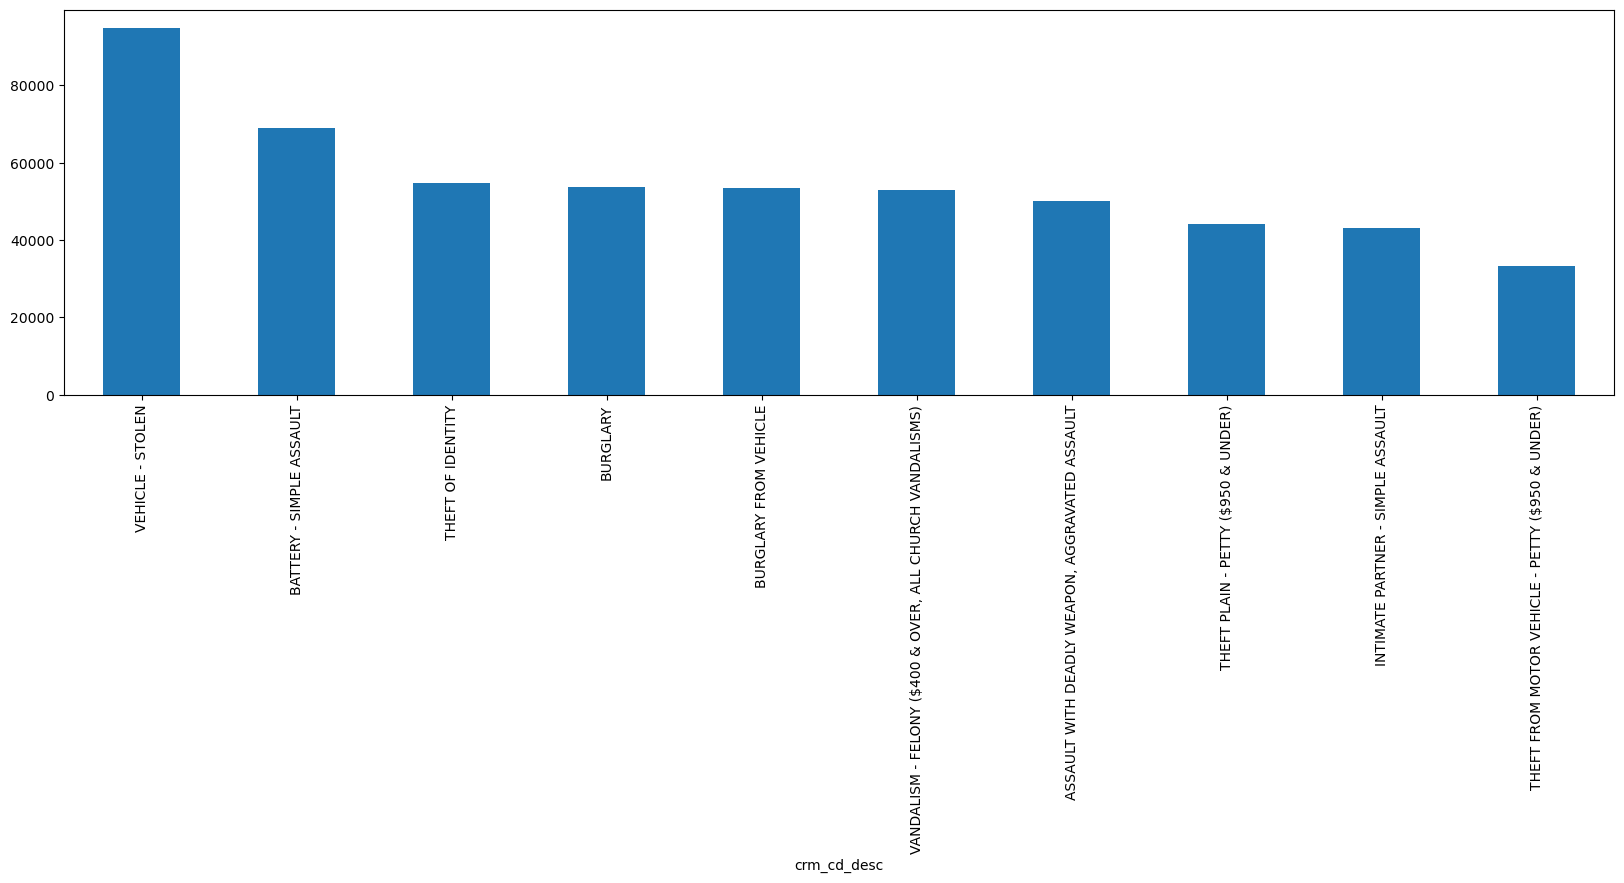

In [42]:
#top 10 crimes committed
crime_code_df_desc.sort_values(ascending=False).head(10).plot(kind="bar",figsize=(20,5))

<Axes: xlabel='crm_cd_desc'>

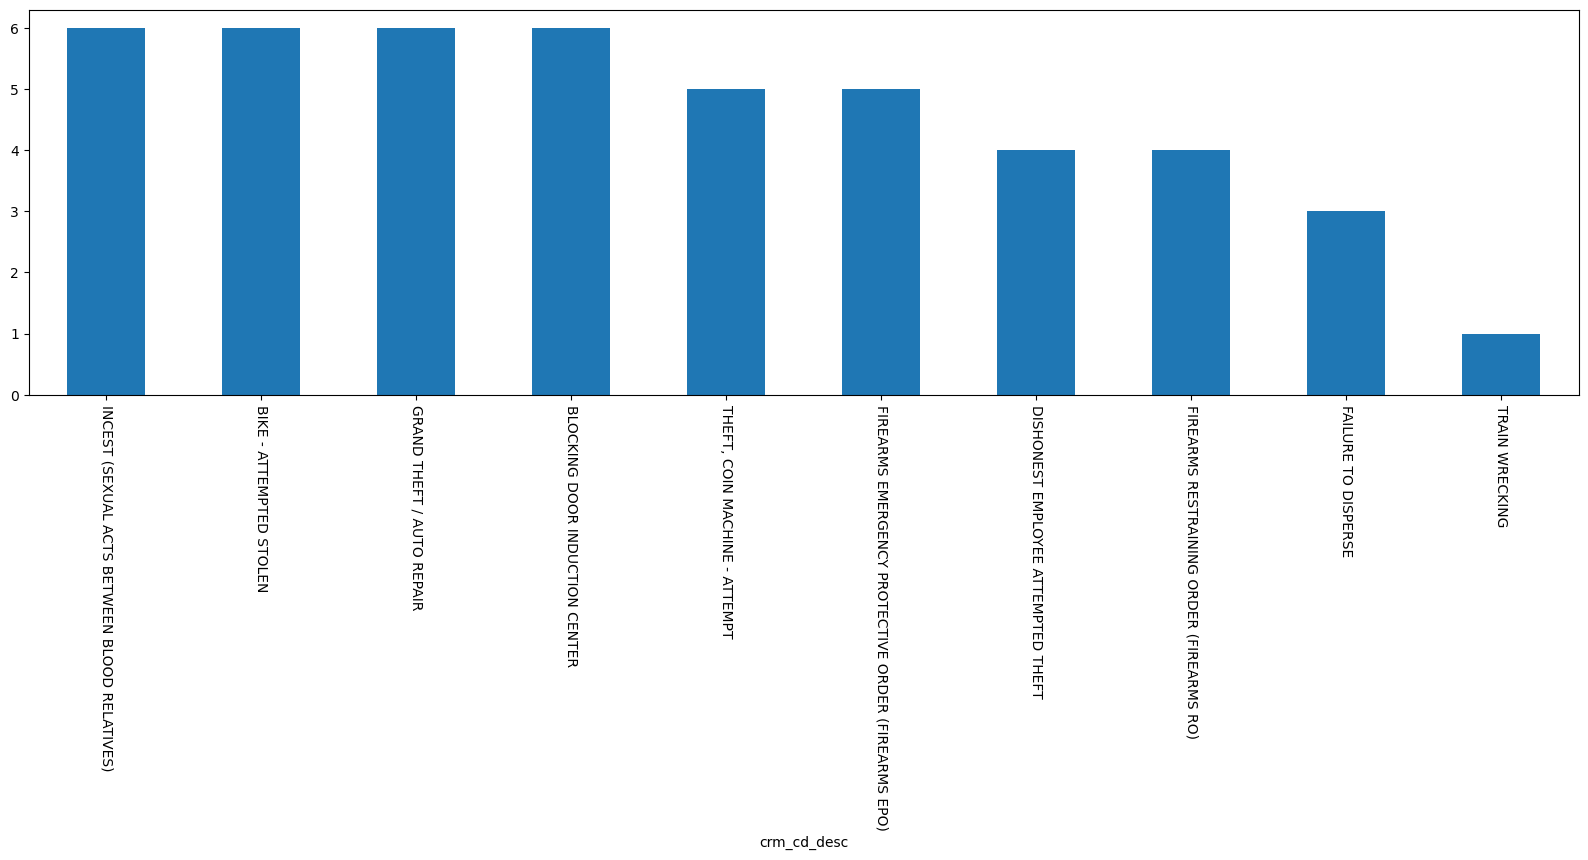

In [43]:
#Least 10 crimes committed

crime_code_df_desc.sort_values(ascending=False).tail(10).plot(kind="bar",figsize=(20,5),rot=-90)

<Axes: xlabel='area_name'>

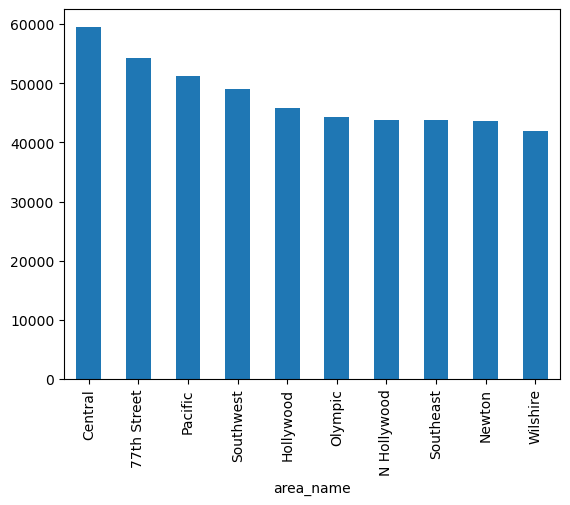

In [44]:
# crime_code_df_area.plot(kind="bar",y="crm_cd_1")
crime_code_df_area["crm_cd_desc"].sort_values(ascending=False).head(10).plot(kind="bar")


In [45]:
crime_code_df_desc_1


,crm_cd,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,Year,area_name
crm_cd_desc,,,,,,,
ARSON,2271,2271,366,4,0,2271,2271
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,1032,1032,219,0,0,1032,1032
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",50137,50137,11822,239,5,50137,50137
ATTEMPTED ROBBERY,4477,4477,759,30,0,4477,4477
BATTERY - SIMPLE ASSAULT,68876,68876,1782,29,5,68876,68876
...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",2017,2017,32,0,0,2017,2017
VIOLATION OF COURT ORDER,5813,5813,118,0,0,5813,5813
VIOLATION OF RESTRAINING ORDER,10840,10840,314,0,0,10840,10840


In [46]:
crime_code_df_desc

crm_cd_desc
ARSON                                                        2271
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 1032
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              50137
ATTEMPTED ROBBERY                                            4477
BATTERY - SIMPLE ASSAULT                                    68876
                                                            ...  
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     2017
VIOLATION OF COURT ORDER                                     5813
VIOLATION OF RESTRAINING ORDER                              10840
VIOLATION OF TEMPORARY RESTRAINING ORDER                      860
WEAPONS POSSESSION/BOMBING                                     37
Length: 139, dtype: int64

In [47]:
response_df_formatted["weapon_desc"].value_counts()


weapon_desc
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    160548
UNKNOWN WEAPON/OTHER WEAPON                        32753
VERBAL THREAT                                      22039
HAND GUN                                           18898
SEMI-AUTOMATIC PISTOL                               6815
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          2
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: count, Length: 79, dtype: int64

In [48]:
crime_code_df_desc.sort_values(ascending=False).head(50)

crm_cd_desc
VEHICLE - STOLEN                                            94862
BATTERY - SIMPLE ASSAULT                                    68876
THEFT OF IDENTITY                                           54875
BURGLARY                                                    53831
BURGLARY FROM VEHICLE                                       53427
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     53080
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              50137
THEFT PLAIN - PETTY ($950 & UNDER)                          44135
INTIMATE PARTNER - SIMPLE ASSAULT                           43120
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             33217
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         31644
ROBBERY                                                     29783
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    29215
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    22444
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    2235

In [50]:
# # Threshold for identifying crimes with less than 6% of total crimes
# threshold = Top_Crimes_LosAngeles.values.sum() * 0.06

# # Create new data and add only crimes which are greater than the threshold of 6%
# Top_Crimes_LosAngeles_large_Category = Top_Crimes_LosAngeles[Top_Crimes_LosAngeles >= threshold]
# Top_Crimes_LosAngeles_small_Category = Top_Crimes_LosAngeles[Top_Crimes_LosAngeles < threshold]
# other_value_sum = Top_Crimes_LosAngeles_small_Category.sum()
# Top_Crimes_LosAngeles_other_Category = pd.concat([Top_Crimes_LosAngeles_large_Category, pd.Series({'Other': other_value_sum})])


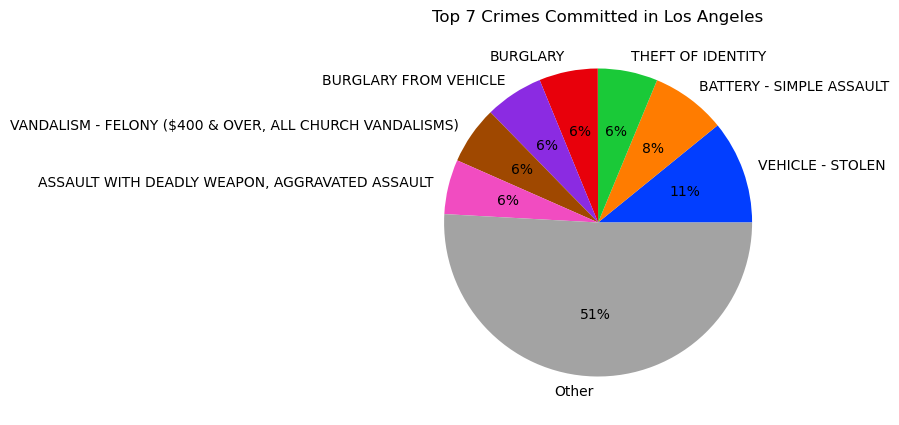

In [99]:
# Top 7 Crimes Committed in Los Angeles

Top_Crimes_LosAngeles=response_df_formatted["crm_cd_desc"].value_counts().sort_values(ascending=False)
# TOP 7 Crimes Committed represent clost to 50% of all the total crimes committed in los angeles in the given period 
# Since there are 139 different crimes description combining the rest into a single other category


# Threshold for identifying crimes with less than 5.5% of total crimes
threshold = Top_Crimes_LosAngeles.values.sum() * 0.055

# Create new data and add only crimes which are greater than the threshold of 6%
Top_Crimes_LosAngeles_large_Category = Top_Crimes_LosAngeles[Top_Crimes_LosAngeles >= threshold]
Top_Crimes_LosAngeles_small_Category = Top_Crimes_LosAngeles[Top_Crimes_LosAngeles < threshold]
other_value_sum = Top_Crimes_LosAngeles_small_Category.sum()
Top_Crimes_LosAngeles_other_Category = pd.concat([Top_Crimes_LosAngeles_large_Category, pd.Series({'Other': other_value_sum})])

#define data
plt.figure(figsize=(10,5))
data=Top_Crimes_LosAngeles_other_Category.values
labels=Top_Crimes_LosAngeles_other_Category.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top 7 Crimes Committed in Los Angeles")
# plt.show()
plt.savefig('Top Crimes Committed in Los Angeles.png')


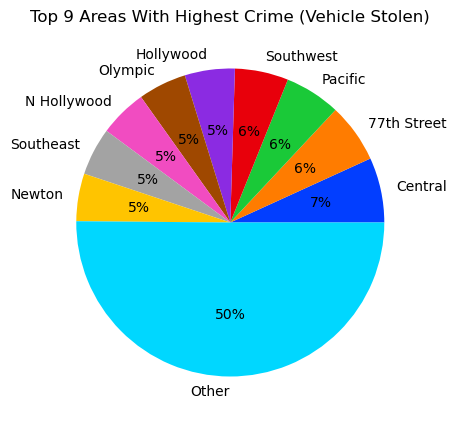

In [100]:
Top_Area_LosAngeles=response_df_formatted["area_name"].value_counts().sort_values(ascending=False)
# Top 9 cities represnet almost 50% of all the total crimes committed in LosAngeles

# Threshold for identifying crimes with less than 4.95% of total crimes
threshold = Top_Area_LosAngeles.values.sum() * 0.0495

# Create new data and add only crimes which are greater than the threshold of 6%
Top_Area_LosAngeles_large_Category = Top_Area_LosAngeles[Top_Area_LosAngeles >= threshold]
Top_Area_LosAngeles_small_Category = Top_Area_LosAngeles[Top_Area_LosAngeles < threshold]
other_value_sum = Top_Area_LosAngeles_small_Category.sum()
Top_Area_LosAngeles_other_Category = pd.concat([Top_Area_LosAngeles_large_Category, pd.Series({'Other': other_value_sum})])



#define data
plt.figure(figsize=(10,5))
data=Top_Area_LosAngeles_other_Category.values
labels=Top_Area_LosAngeles_other_Category.index


#define Seaborn color palette to use
colors = sns.color_palette('bright')


# plt.pie(x=Top_Crimes_LosAngeles.values,labels=Top_Crimes_LosAngeles.index,autopct='%.0f%%')
plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top 9 Areas With Highest Crime (Vehicle Stolen)")
# plt.show()
plt.savefig('Top Areas With Highest Crime.png')

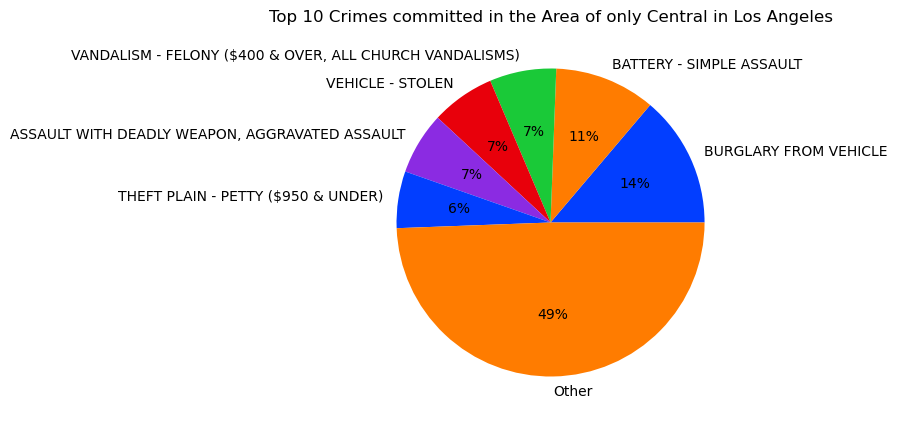

In [101]:
All_Crimes_Comitted_in_Central=response_df_formatted[response_df_formatted["area_name"]=="Central"]["crm_cd_desc"].value_counts().sort_values(ascending=False)
# Count is 62658


# Threshold for identifying crimes with less than 4.95% of total crimes
threshold = All_Crimes_Comitted_in_Central.values.sum() * 0.05

# Create new data and add only crimes which are greater than the threshold of 6%
Crimes_Comitted_in_Central_large_Category = All_Crimes_Comitted_in_Central[All_Crimes_Comitted_in_Central >= threshold]
Crimes_Comitted_in_Central_small_Category = All_Crimes_Comitted_in_Central[All_Crimes_Comitted_in_Central < threshold]
other_value_sum = Crimes_Comitted_in_Central_small_Category.sum()
Crimes_Comitted_in_Central_other_Category = pd.concat([Crimes_Comitted_in_Central_large_Category, pd.Series({'Other': other_value_sum})])


#define data
plt.figure(figsize=(10,5))
data=Crimes_Comitted_in_Central_other_Category.values
labels=Crimes_Comitted_in_Central_other_Category.index

# #define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top 10 Crimes committed in the Area of only Central in Los Angeles")
# plt.show()
plt.savefig('Top 10 Crimes committed in the Area of only Central in Los Angeles.png')

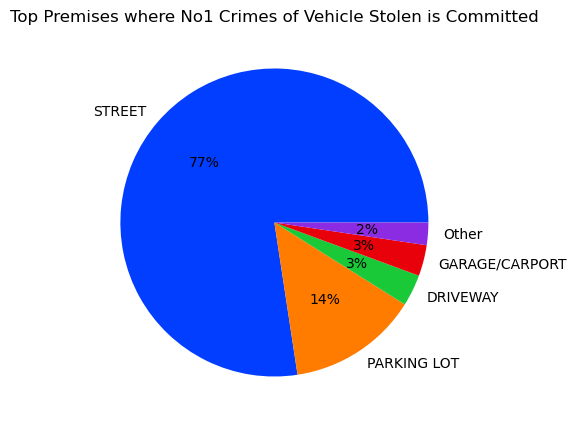

In [108]:
# Ditribution by Year of Top1 Crime Committed
Premise_of_Vehicle_Stolen=response_df_formatted[response_df_formatted["crm_cd_desc"]=="VEHICLE - STOLEN"]["premis_desc"].value_counts().sort_values(ascending=False)


# Threshold for identifying crimes with less than 4.95% of total crimes
threshold = Premise_of_Vehicle_Stolen.values.sum() * 0.03

# Create new data and add only crimes which are greater than the threshold of 6%
Premise_of_Vehicle_Stolen_large_Category = Premise_of_Vehicle_Stolen[Premise_of_Vehicle_Stolen >= threshold]
Premise_of_Vehicle_Stolen_small_Category = Premise_of_Vehicle_Stolen[Premise_of_Vehicle_Stolen < threshold]
other_value_sum = Premise_of_Vehicle_Stolen_small_Category.sum()
Premise_of_Vehicle_Stolen_All_Category = pd.concat([Premise_of_Vehicle_Stolen_large_Category, pd.Series({'Other': other_value_sum})])


#define data
plt.figure(figsize=(10,5))
data=Premise_of_Vehicle_Stolen_All_Category.values
labels=Premise_of_Vehicle_Stolen_All_Category.index

# # #define Seaborn color palette to use
colors = sns.color_palette('bright')


plt.pie(x=data,labels=labels,colors=colors,autopct='%.0f%%')
plt.title("Top Premises where No1 Crimes of Vehicle Stolen is Committed")
# plt.show()
plt.savefig('Top Premises where No1 Crimes of Vehicle Stolen is Committed.png')


premis_desc
STREET                                                       73426
PARKING LOT                                                  12967
DRIVEWAY                                                      3144
GARAGE/CARPORT                                                3084
PARKING UNDERGROUND/BUILDING                                   650
                                                             ...  
CEMETARY*                                                        1
PUBLIC STORAGE                                                   1
CATERING/ICE CREAM TRUCK                                         1
DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*        1
SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS                     1
Name: count, Length: 71, dtype: int64